In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [7]:
# Create a Sample data set
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [8]:
# Scaling Data set (mean=0, SD=1)
scaled_data = preprocessing.scale(data.T)

In [9]:
# PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

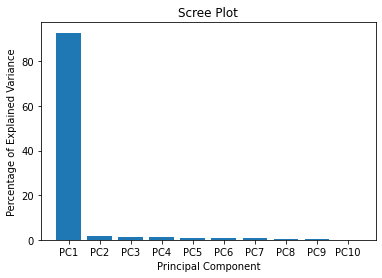

In [6]:
# Scree Plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

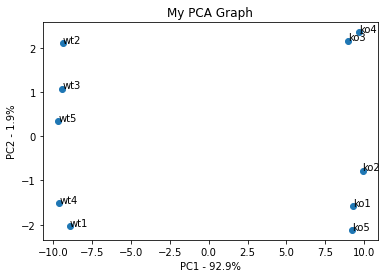

In [10]:
# Scatter Plot
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

In [14]:
# Look at the loading scores for PC1
loading_PC1_scores = pd.Series(pca.components_[0], index=genes) # the principal components = zero index, so PC1 = zero index
sorted_loading_PC1_scores = loading_PC1_scores.abs().sort_values(ascending=False)

top_10_genes_PC1 = sorted_loading_PC1_scores[:10].index.values

print(loading_PC1_scores[top_10_genes_PC1])

gene100   -0.106340
gene9      0.106281
gene26    -0.106252
gene65    -0.106241
gene58    -0.106232
gene41     0.106228
gene46     0.106223
gene91    -0.106223
gene76    -0.106206
gene47    -0.106187
dtype: float64
